# **Analyzing Filmin User Reviews from Trustpilot with NLP, DistilBERT, BERTopic and Gradio**

## **PART 1:** Prepare the data

### **1.** Install the required Python libraries for web scraping and data analysis,

This includes requests for HTTP requests, BeautifulSoup and lxml for HTML parsing, and pandas for data manipulation.

This ensures all dependencies are available for the subsequent steps in the notebook.

In [ ]:
pip install requests beautifulsoup4 pandas lxml

### **2.** Web Scraping of Filmin Reviews from Trustpilot

This cell runs an external Python script (scraper.py) that automatically scrapes all user reviews of Filmin from Trustpilot, processes the data, and saves the results as a CSV file (Filmin_reviews.csv).

This file will be used for further analysis in the notebook

In [ ]:
!python scraper.py

Reviews saved in 'Filmin_reviews.csv'


### **3.** Load and Preview the Scraped Reviews Data

Imports the pandas library for data manipulation. Loads the CSV file (Filmin_reviews.csv) containing the scraped Filmin reviews into a DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv('Filmin_reviews.csv')
df.head()  # Muestra las primeras filas del DataFrame


,Date,Author,Body,Heading,Rating,Location
0,2024-11-08,Aroa Martínez,Estoy muy contenta con Filmin desde que lo des...,Agradecida a Filmin por existir,5,ES
1,2024-11-27,Oscar Sueiro L�pez,"Cine, cine y más cine. \nLo único malo que pue...",Quiero la prejubilación y más Filmin,5,ES
2,2024-11-22,Maria Miret,En Filmin está el mejor cine. Ver una buena pe...,En Filmin está el mejor cine,5,ES
3,2025-05-21,Luis Carbajosa,Durante estos últimos años me habéis acompañad...,Ahora intentan copiaros,5,ES
4,2025-05-17,Andreu Salvat,Felicitats per ser una magnífica plataforma pe...,Interfície en català,4,ES


### **4.** Dataset Overview and Statistical Summary

*   `df.info()` provides a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage.

*   `df.describe(include='all')` generates descriptive statistics for all columns, showing measures such as count, unique values, top occurrences, frequency, mean, standard deviation, and percentiles, depending on the data type.

These commands help understand the completeness, data types, and basic distribution of values in the dataset.



In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      492 non-null    object
 1   Author    492 non-null    object
 2   Body      492 non-null    object
 3   Heading   492 non-null    object
 4   Rating    492 non-null    int64 
 5   Location  492 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.2+ KB


,Date,Author,Body,Heading,Rating,Location
count,492,492,492,492,492.000000,492
unique,196,454,492,475,NaN,20
top,2025-01-16,Consumer,"Contenidos de calidad , dificiles de encontrar...",Imprescindible,NaN,ES
freq,8,9,1,6,NaN,458
mean,NaN,NaN,NaN,NaN,4.459350,NaN
std,NaN,NaN,NaN,NaN,0.929475,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN


### **5.** Count Missing Values per Column

Calculates and displays the total number of missing (null) values in each column of the DataFrame.

This helps identify which columns may require data cleaning or handling of missing values before further analysis.

In [ ]:
df.isnull().sum()

,0
Date,0
Author,0
Body,0
Heading,0
Rating,0
Location,0


### **6.** Detect and Remove Duplicate Reviews Based on Text

* Prints the number of duplicate entries found in the 'Body' column, which contains the main text of each review.

* Removes all duplicate reviews based on the 'Body' column, keeping only the first occurrence of each unique review text.

* Resets the DataFrame index to ensure sequential ordering after duplicates are dropped.

In [ ]:
print("'Body' duplicates:", df.duplicated(subset='Body').sum())
df = df.drop_duplicates(subset='Body').reset_index(drop=True)

'Body' duplicates: 0


### **7.** Convert Data Types for Analysis

* Converts the 'Date' column to datetime format, ensuring proper handling of dates.

* Converts the 'Rating' column to numeric format, enabling numerical analysis and calculations.

Running `df.info()` and `df.describe(include='all')` again allows you to confirm that the DataFrame’s structure and statistics have been updated after removing duplicates or performing other cleaning steps.

This ensures that the dataset is consistent, free of unwanted duplicates, and ready for further analysis.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      492 non-null    datetime64[ns]
 1   Author    492 non-null    object        
 2   Body      492 non-null    object        
 3   Heading   492 non-null    object        
 4   Rating    492 non-null    int64         
 5   Location  492 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 23.2+ KB


,Date,Author,Body,Heading,Rating,Location
count,492,492,492,492,492.000000,492
unique,NaN,454,492,475,NaN,20
top,NaN,Consumer,"Contenidos de calidad , dificiles de encontrar...",Imprescindible,NaN,ES
freq,NaN,9,1,6,NaN,458
mean,2025-01-27 21:54:08.780487936,NaN,NaN,NaN,4.459350,NaN
min,2024-07-14 00:00:00,NaN,NaN,NaN,1.000000,NaN
25%,2024-12-10 18:00:00,NaN,NaN,NaN,4.000000,NaN
50%,2025-01-22 00:00:00,NaN,NaN,NaN,5.000000,NaN
75%,2025-03-20 06:00:00,NaN,NaN,NaN,5.000000,NaN
max,2025-07-10 00:00:00,NaN,NaN,NaN,5.000000,NaN


### **8.** Identify and Remove Empty or Very Short Reviews

Prints:
* The number of reviews in the 'Body' column that are empty (null).

* The number of reviews that are too short (less than 10 characters).

Removes all reviews that are either empty or too short, keeping only meaningful review texts for further analysis.

Resets the DataFrame index after filtering.

In [ ]:
print("Empty reviews:", df['Body'].isnull().sum())
print("Too short reviews:", (df['Body'].str.len() < 10).sum())
df = df[df['Body'].notnull() & (df['Body'].str.len() >= 10)].reset_index(drop=True)

Empty reviews: 0
Too short reviews: 0


### **9.** Validate and Filter Ratings Within Expected Range

* Prints any reviews with a 'Rating' value outside the expected range of 1 to 5.

* Removes all reviews with ratings outside this range, ensuring only valid ratings are included in the dataset for analysis.

In [ ]:
print("Ratings out of range:", df[~df['Rating'].between(1, 5)])
df = df[df['Rating'].between(1, 5)]

Ratings out of range: Empty DataFrame
Columns: [Date, Author, Body, Heading, Rating, Location]
Index: []


### **10.** Dataset Summary and Sample Reviews
* Prints the total number of reviews, unique authors, and unique locations in the dataset.

* Shows the distribution of ratings and the range of review dates.

* Displays an example of a positive review (rating 5) and a negative review (rating 1) to illustrate the content and sentiment present in the data.

In [ ]:
print("Total reviews:", len(df))
print("Unique authors:", df['Author'].nunique())
print("Unique locations:", df['Location'].nunique())
print("Ratings distribution:\n", df['Rating'].value_counts().sort_index())
print("Dates ranges:", df['Date'].min(), "a", df['Date'].max())

# Ejemplo de opiniones positivas y negativas
print("\nPositive review example:")
print(df[df['Rating'] == 5]['Body'].iloc[0])

print("\nNegative review example:")
print(df[df['Rating'] == 1]['Body'].iloc[0])

Total reviews: 492
Unique authors: 454
Unique locations: 20
Ratings distribution:
 Rating
1     18
2      6
3     25
4    126
5    317
Name: count, dtype: int64
Dates ranges: 2024-07-14 00:00:00 a 2025-07-10 00:00:00

Positive review example:
Estoy muy contenta con Filmin desde que lo descubrí, me permite ver buena series y documentales que otras plataformas no ponen y tambien me permite aprender sobre buen cine y buenos directores. Por favor, no pongáis nunca publicidad antes de las pelis o durante como hacen otras plataformas porque es un asesinato y un dolor. Muchas gracias. 

Negative review example:
No se puede pagar y suscribir desde Chile. Antes si se podía y disfrutaba de Filmin


### **11. Test with results and searchs:**  Identify Authors with Multiple Reviews

* Counts the number of reviews written by each author.

* Filters for authors who have published more than one review.

* Converts the result to a DataFrame and renames the columns for clarity.

* Sorts the authors first by the number of reviews (descending) and then alphabetically by author name (ascending).

* Displays the resulting DataFrame.

In [ ]:
author_counts = df['Author'].value_counts()

authors_more_than_one = author_counts[author_counts > 1]

authors_df = authors_more_than_one.reset_index()
authors_df.columns = ['Author', 'Num_Reviews']

authors_df = authors_df.sort_values(by=['Num_Reviews', 'Author'], ascending=[False, True]).reset_index(drop=True)

authors_df

,Author,Num_Reviews
0,Consumer,9
1,AChaney,2
2,Alfredo Gutierrez,2
3,Ana,2
4,Antoni Salvador,2
5,Asuncion Sanchez MadrileÃ±o,2
6,Beltran Garces,2
7,Carlos,2
8,Carmen,2
9,Cristina,2


### **12. Test with results and searchs:**  Identify the Top 5 Days with the Most Reviews
* Groups the DataFrame by the 'Date' column and counts the number of reviews for each day.

* Sorts the results by the number of reviews in descending order, and by date in ascending order in case of ties.

* Displays the five days with the highest number of reviews, helping to identify periods of peak user activity.

In [ ]:
reviews_per_day = df.groupby('Date').size().reset_index(name='Num_Reviews')

reviews_per_day = reviews_per_day.sort_values(by=['Num_Reviews', 'Date'], ascending=[False, True])

top_5_days = reviews_per_day.head(5)
top_5_days

,Date,Num_Reviews
81,2025-01-13,8
83,2025-01-16,8
63,2024-12-23,7
91,2025-01-24,7
2,2024-07-16,6


### **13.** Text Field Selection
* Combine Body with the Heading column.
* We do this because combining them can provide additional context and information for natural language processing tasks.
* The title often summarizes or highlights the main sentiment or topic of the review, so including it can improve the quality of sentiment analysis, topic modeling, and other NLP applications.

In [ ]:
df['Review'] = df['Heading'].fillna('') + '. ' + df['Body'].fillna('')

### **14.** Basic Text Cleaning
* Remove null values, empty texts, or very short texts.

* Correct encoding errors and remove any strange or unwanted characters if present.

In [ ]:
df = df[df['Review'].notnull() & (df['Review'].str.strip() != '')].reset_index(drop=True)

df = df[df['Review'].str.len() >= 10].reset_index(drop=True)

### **15.** Text Normalization
* Convert all text to lowercase (optional, but recommended for topic modeling).

* Remove extra whitespace, line breaks, etc.

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\s+', ' ', text)  # extra whitespace
    text = re.sub(r'\n', ' ', text)   # line breaks
    text = re.sub(r'[^\w\sáéíóúüñ]', '', text)  # remove punctuation (optional)
    return text.strip()

df['Clean_Review'] = df['Review'].apply(clean_text)

### **16.** Download spaCy Language Models for Spanish, English, and Catalan

* Installs the small spaCy language models for Spanish (`es_core_news_sm`), English (`en_core_web_sm`), and Catalan (`ca_core_news_sm`).

* This enables advanced text preprocessing, such as lemmatization and stopword removal, for reviews written in any of these three languages.

+ Ensures that multilingual reviews can be properly prepared for topic modeling with BERTopic and sentiment analysis with DistilBERT.

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm
!python -m spacy download ca_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 60.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('

### **17.** Detect Language for Each Review

Uses the `langdetect` library to identify the language of each review in the 'Clean_Review' column and creates a new 'Language' column.

In [ ]:
!pip install langdetect

from langdetect import detect, DetectorFactory
import time

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown' # Return 'unknown' for texts where language detection fails

# Apply language detection to the 'Clean_Review' column with a short delay to avoid hitting API limits
df['Language'] = df['Clean_Review'].apply(lambda x: detect_language(x))

# Display the distribution of detected languages
print("Language distribution:\n", df['Language'].value_counts())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=ff4dc16523682fb41ecda42ead28528c7311aedcb8ff7108e644fdb15d78ba17
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Language distribution:
 Language
es    443
ca     44
it      2
pt      2
fr      1
Name: count, dtype: int64


### **18.** Lemmatize and Remove Stopwords from Multilingual Reviews
* Loads the spaCy language models for Spanish, English, and Catalan.

* Defines a function that processes each review according to its language, lemmatizing the text and removing stopwords and non-alphabetic tokens.

* Applies this function to each review using the language specified in the Language column, creating a new column (BERTOPIC_Text) with preprocessed text ready for topic modeling with BERTopic.

This approach ensures accurate and language-appropriate preprocessing for multilingual datasets.



*It is not necessary to manually tokenize in this process because both spaCy and transformer-based models like DistilBERT and BERTopic have built-in tokenization mechanisms that automatically split and process the text into tokens as required for their analysis*


In [ ]:
import unicodedata

def remove_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [ ]:
import spacy

# Load spaCy models for Spanish, English, and Catalan
nlp_es = spacy.load('es_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')
nlp_ca = spacy.load('ca_core_news_sm')

# Define a custom set of stopwords to remove additional uninformative words
custom_stopwords = set([

    # Words common to all languages
    'filmin','app',

    # Spanish stopwords
    'película', 'peliculas', 'plataforma', 'cine', 'catálogo', 'contenido', 'serie', 'ver',
    'calidad', 'catalogo', 'mejor', 'muy', 'más', 'menos', 'también', 'puede', 'pueden', 'hacer', 'ser', 'tener', 'hay',
    'de', 'la', 'el', 'él', 'que', 'en', 'y', 'e', 'a', 'lo', 'por', 'una', 'para', 'con', 'del', 'pero', 'se', 'un', 'una', 'al', 'como',
    'su', 'es', 'siempre', 'las', 'los', 'mi', 'nos', 'yo', 'si', 'le', 'ya', 'este', 'esta', 'son', 'o', 'porque',
    'entre', 'sobre', 'desde', 'hasta', 'sin', 'donde', 'cuando', 'tengo', 'todo', 'todos', 'todas', 'cada', 'bien',
    'nada', 'algo', 'mucho', 'poco', 'otro', 'otra', 'otros', 'otras', 'uno', 'dos', 'tres', 'primer', 'primera',
    'segundo', 'segunda', 'vez', 'veces', 'año', 'años', 'mes', 'meses', 'día', 'días', 'hora', 'horas', 'minuto', 'minutos',
    'películas', 'series','gustar',

    # English stopwords
    'the', 'and', 'a', 'to', 'of', 'in', 'is', 'it', 'for', 'on', 'that', 'this', 'with', 'as', 'but', 'be', 'at', 'by',
    'an', 'or', 'from', 'so', 'if', 'are', 'was', 'were', 'not', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could',
    'will', 'would', 'should', 'may', 'might', 'must', 'about', 'after', 'before', 'above', 'below', 'over', 'under',
    'between', 'among', 'all', 'any', 'some', 'none', 'much', 'many', 'few', 'more', 'most', 'less', 'least', 'each',
    'every', 'either', 'neither', 'no', 'yes', 'he', 'she', 'they', 'them', 'we', 'us', 'you', 'your', 'my', 'mine', 'our',
    'ours', 'their', 'theirs', 'its', 'i', 'me', 'him', 'her', 'his', 'hers', 'what', 'which', 'who', 'whom', 'whose',
    'when', 'where', 'why', 'how', 'again', 'once', 'here', 'there', 'then', 'than', 'also', 'just', 'even', 'still',
    'too', 'very', 'really', 'film', 'movie', 'platform', 'content',

    # Catalan stopwords
    'i', 'per', 'amb', 'les', 'els', 'com', 'es', 'també', 'molt', 'no', 'sí', 'tot', 'tots', 'totes', 'tota', 'cap',
    'quan', 'on', 'perquè', 'doncs', 'però', 'fins', 'després', 'abans', 'mentre', 'sense', 'aquest', 'aquesta', 'aquests',
    'aquestes', 'aquell', 'aquella', 'aquells', 'aquelles', 'meu', 'meva', 'nostre', 'vostre', 'seu', 'seva', 'teu',
    'teva', 'teua', 'hi', 'li', 'ens', 'em', 'et', 'són', 'tenir', 'fer', 'veure', 'ben', 'res', 'alguna', 'algun',
    'alguns', 'algunes', 'altre', 'altres', 'vegada', 'vegades', 'any', 'anys', 'mes', 'mesos', 'dies', 'hores',
    'minut', 'minuts', 'pel·lícula', 'pel·lícules', 'catàleg', 'contingut', 'cinema', 'sèrie', 'sèries'
])

# Function to lemmatize and remove stopwords for a given language
def lemmatize_and_remove_stopwords(text, lang):
    # Select the appropriate spaCy model and stopword set
    if lang == 'es':
        nlp = nlp_es
        stopwords = nlp.Defaults.stop_words.union(custom_stopwords)
    elif lang == 'en':
        nlp = nlp_en
        stopwords = nlp.Defaults.stop_words.union(custom_stopwords)
    elif lang == 'ca':
        nlp = nlp_ca
        stopwords = nlp.Defaults.stop_words.union(custom_stopwords)
    else:
        # Default to Spanish if language is unknown or missing
        nlp = nlp_es
        stopwords = nlp.Defaults.stop_words.union(custom_stopwords)
    doc = nlp(text)

    # Normaliza las stopwords
    normalized_stopwords = set(remove_accents(w.lower()) for w in stopwords)

    doc = nlp(text)
    tokens = []
    for token in doc:
        lemma = token.lemma_.lower()
        lemma_norm = remove_accents(lemma)
        if (
            not token.is_stop and
            token.is_alpha and
            lemma_norm not in normalized_stopwords
        ):
            tokens.append(token.lemma_)
    return ' '.join(tokens)


    # Lemmatize, remove stopwords, non-alphabetic tokens, and custom stopwords
    # tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.lemma_ not in stopwords]
    # return ' '.join(tokens)

# Apply the function to each review, assuming you have a 'Language' column that specifies 'es', 'en', or 'ca'
df['BERTOPIC_Text'] = df.apply(lambda row: lemmatize_and_remove_stopwords(row['Clean_Review'], row['Language']), axis=1)

### **19.** Prepare lists for the models

This cell creates two separate lists of review texts:
* **One for use with DistilBERT:** Contains the cleaned but otherwise unprocessed review texts
* **Another for use with BERTopic:** Contains texts that have been lemmatized and had stopwords removed, making them more suitable for topic modeling.

This process ensures each model receives the text in the format best suited to its requirements.

This `df` code allows you to visually and quantitatively verify that stopwords have been effectively removed from the lemmatized review texts.

In [ ]:
# For DistilBERT (natural text, without lemmatization or stopword removal)
distibert_texts = df['Clean_Review'].tolist()

# For BERTopic (lemmatized text without stopwords)
bertopic_texts = df['BERTOPIC_Text'].tolist()

df[['Clean_Review', 'BERTOPIC_Text']].sample(10, random_state=42)

,Clean_Review,BERTOPIC_Text
78,para nosotras es la mejor plataforma para noso...,apetecer divertido apetecer conmover yo aprend...
55,canal para cinefilos me gusta ver el cine clás...,canal cinefi él clásico antiguo canal crítica ...
272,buena plataforma pero buena plataforma con muc...,europea woke fallo
286,me parece un buen catálogo de cine y la me par...,organización tema resultar útil
63,vale cada céntimo que pagamos vale cada céntim...,valer céntimo pagar valer céntimo pagar tipo é...
182,es un magnífico milagro tener filmin y es un m...,magnífico milagro magnífico milagro maravillos...
30,el servicio técnico ha resuelto bien el proble...,servicio técnico resolver problema lento seman...
117,excelente selección de peliculas selección muy...,excelente selección selección amplio disfrutar...
464,buen catálogo regular reproductor aunque el ca...,regular reproductor amplio reproducción fluido...
336,fácil encontrar contenidos de interés casi sie...,fácil encontrar interés encontrar interés


## **PART 2:** Sentiment Analysis with DistilBERT

### **20.** Install Hugging Face Transformers and Torch
Installs the required libraries for using pre-trained transformer models such as DistilBERT.

In [ ]:
!pip install transformers torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.1 MB/s eta 0:00:00


### **21.** Import Libraries for Sentiment Analysis
Imports the necessary modules from Hugging Face Transformers and other supporting libraries.

In [ ]:
from transformers import pipeline
import pandas as pd

### **22.** Load the Sentiment Analysis Pipeline
Loads a pre-trained sentiment analysis pipeline.

For multilingual data, the `nlptown/bert-base-multilingual-uncased-sentiment` model is often used, as it supports English, Spanish, and several other languages.

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


### **23.** Run Sentiment Analysis on Reviews
Applies the sentiment analysis pipeline to each review in the distibert_texts list and stores the results.

In [ ]:
results = sentiment_pipeline(distibert_texts, truncation=True)

### **24.** Add Sentiment Results to DataFrame
Extracts the sentiment labels and scores from the results and adds them as new columns to your DataFrame.

In [ ]:
df['DistilBERT_Sentiment'] = [r['label'] for r in results]
df['DistilBERT_Score'] = [r['score'] for r in results]
df[['Clean_Review', 'DistilBERT_Sentiment', 'DistilBERT_Score']].head()

,Clean_Review,DistilBERT_Sentiment,DistilBERT_Score
0,agradecida a filmin por existir estoy muy cont...,5 stars,0.759347
1,quiero la prejubilación y más filmin cine cine...,1 star,0.481927
2,en filmin está el mejor cine en filmin está el...,5 stars,0.788123
3,ahora intentan copiaros durante estos últimos ...,5 stars,0.468674
4,interfície en català felicitats per ser una ma...,3 stars,0.322156


### **25.** Quick Sentiment Distribution Overview
Displays the distribution of predicted sentiment labels to give a quick overview of the results.

In [ ]:
df['DistilBERT_Sentiment'].value_counts()

,count
DistilBERT_Sentiment,
5 stars,259
4 stars,107
3 stars,65
1 star,39
2 stars,22


### **26.** Sentiment Distribution Bar Chart
Visualizes the count of each sentiment label predicted by DistilBERT using a bar chart.

This helps you quickly see the overall sentiment balance in the reviews.

/tmp/ipython-input-30-3939962110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


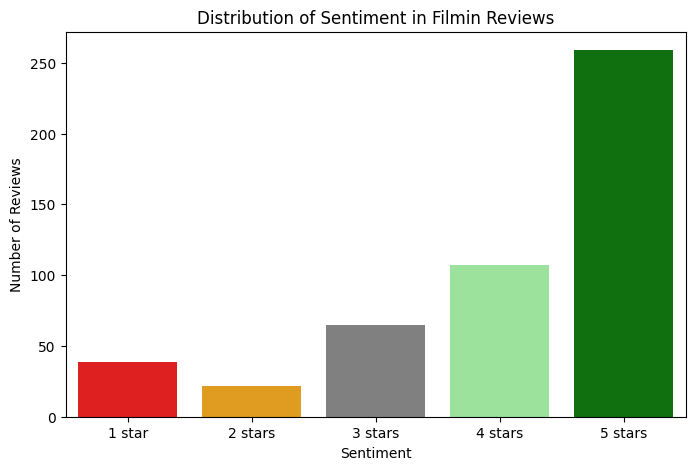

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    x='DistilBERT_Sentiment',
    data=df,
    order=sorted(df['DistilBERT_Sentiment'].unique()),
    palette={'1 star':'red', '2 stars':'orange', '3 stars':'gray', '4 stars':'lightgreen', '5 stars':'green'}
)
plt.title('Distribution of Sentiment in Filmin Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

### **27.** Sentiment Confidence Score Bar Plot
Displays the sentiment confidence scores for a sample of reviews, colored by sentiment.

This allows to assess the model's confidence in its predictions.

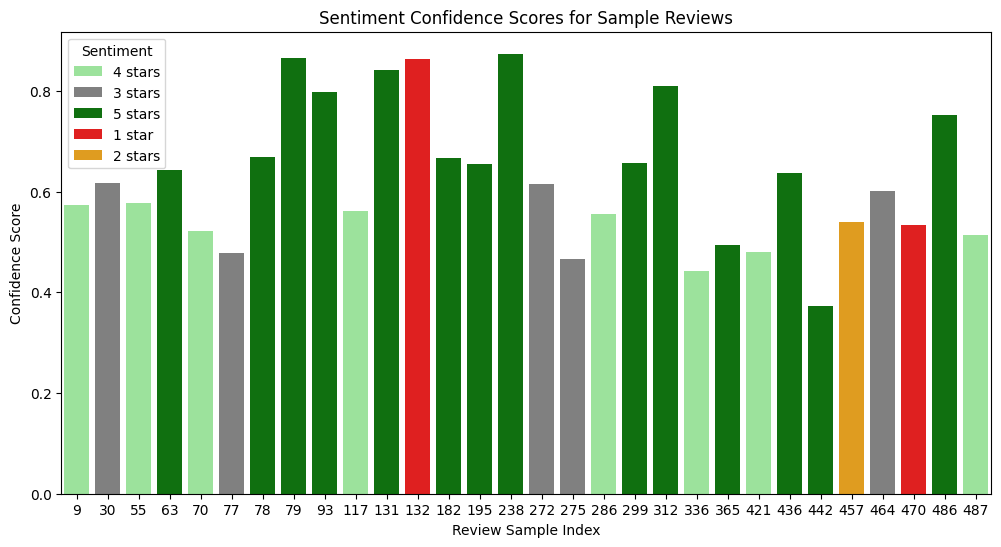

In [ ]:
sample = df.sample(30, random_state=42)  # Sample 30 reviews for clarity
plt.figure(figsize=(12,6))
sns.barplot(
    x=sample.index,
    y=sample['DistilBERT_Score'],
    hue=sample['DistilBERT_Sentiment'],
    palette={'1 star':'red', '2 stars':'orange', '3 stars':'gray', '4 stars':'lightgreen', '5 stars':'green'}
)
plt.title('Sentiment Confidence Scores for Sample Reviews')
plt.xlabel('Review Sample Index')
plt.ylabel('Confidence Score')
plt.legend(title='Sentiment')
plt.show()

### **28.** Sentiment Over Time Line Plot
Shows how the average sentiment score changes over time, revealing trends or shifts in user opinions.

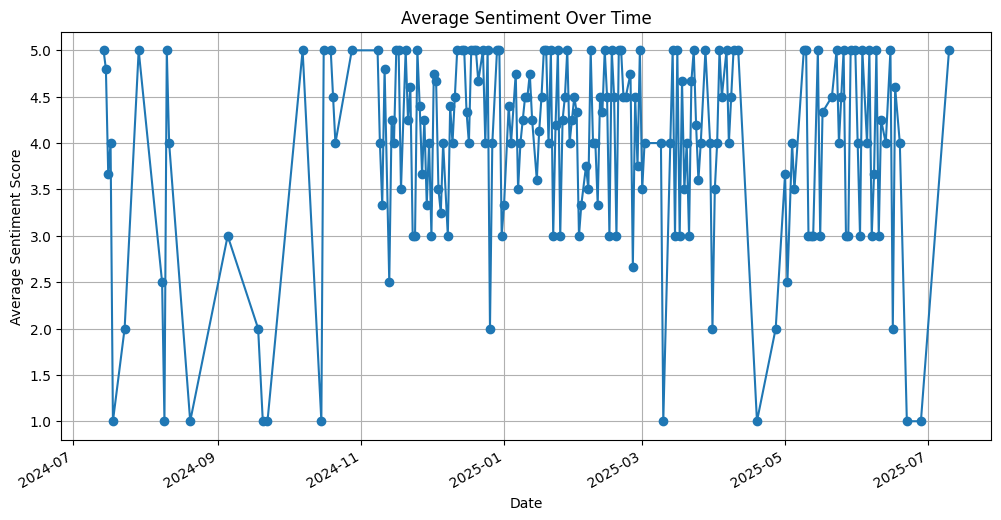

In [ ]:
# Convert sentiment labels to numeric scores for plotting (1 to 5)
sentiment_map = {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}
df['Sentiment_Score'] = df['DistilBERT_Sentiment'].map(sentiment_map)

# Group by date and plot the average sentiment
sentiment_over_time = df.groupby('Date')['Sentiment_Score'].mean()
plt.figure(figsize=(12,6))
sentiment_over_time.plot(marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

### **29.** Word Clouds by Sentiment

Generates word clouds for positive and negative reviews, highlighting the most frequent words in each sentiment group.

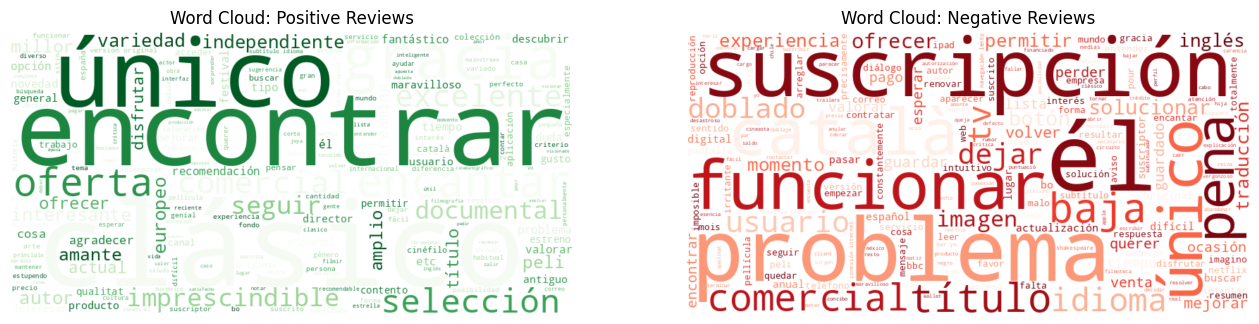

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Positive reviews (4 and 5 stars)
positive_text = ' '.join(df[df['Sentiment_Score'] >= 4]['BERTOPIC_Text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Negative reviews (1 and 2 stars)
negative_text = ' '.join(df[df['Sentiment_Score'] <= 2]['BERTOPIC_Text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Reviews')

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Negative Reviews')
plt.show()

## **PART 3:** Topic modeling with BERTopic

### **30.** Install BERTopic and Dependencies
Installs BERTopic and all necessary dependencies for topic modeling and visualization.

In [ ]:
!pip install bertopic[all] --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 3.8 MB/s eta 0:00:00


### **31.** Import BERTopic and Supporting Libraries

Imports BERTopic and other required libraries for topic modeling.

In [ ]:
from bertopic import BERTopic
import pandas as pd

### **32.** Create and Fit the BERTopic Model

Initializes a BERTopic model (multilingual) and fits it to the lemmatized, stopword-free review texts to extract topics.

In [ ]:
bertopic_model = BERTopic(language="multilingual", min_topic_size=5, nr_topics=10)
topics, probabilities = bertopic_model.fit_transform(bertopic_texts)

# Assign the topics to the DataFrame
df['BERTopic_Label_Refined'] = topics

print("BERTopic model defined and fitted with reduced number of topics.")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERTopic model defined and fitted with reduced number of topics.


### **33.** Calculate the quantity of topics
Including the -1 that use to be outliers.

In [ ]:
topic_info = bertopic_model.get_topic_info()
print(topic_info['Topic'].unique())  # Should be [-1, 0, 1, ..., 10]
print("Number of topics (including -1):", len(topic_info))

[-1  0  1  2  3  4  5  6  7  8]
Number of topics (including -1): 10


### **34.** Explore the Most Frequent Topics

Displays the most frequent topics and their representative keywords, helping you understand the main themes in the reviews.

In [ ]:
# Assuming bertopic_model is fitted and available from previous cells

# Get topic information from the model
topic_info_with_labels = bertopic_model.get_topic_info()

# Display the most frequent topics, their names, and keywords
print("\nMost Frequent Topics and Keywords:")
# Select relevant columns for display: Topic, Count, Name (custom or default), Representation (keywords)
display(topic_info_with_labels[['Topic', 'Count', 'Name', 'Representation']].head(10))


Most Frequent Topics and Keywords:


,Topic,Count,Name,Representation
0,-1,167,-1_encantar_clásico_encontrar_cosa,"[encantar, clásico, encontrar, cosa, título, ú..."
1,0,76,0_selección_único_gusto_interesante,"[selección, único, gusto, interesante, comerci..."
2,1,55,1_streaming_tv_problema_él,"[streaming, tv, problema, él, netflix, mejorar..."
3,2,44,2_documental_qualitat_català_pellícula,"[documental, qualitat, català, pellícula, bo, ..."
4,3,41,3_clásico_autor_británico_esperar,"[clásico, autor, británico, esperar, variedad,..."
5,4,36,4_maravilloso_amas_concibo_sumir,"[maravilloso, amas, concibo, sumir, méxico, ap..."
6,5,26,5_español_él_cinéfilo_problema,"[español, él, cinéfilo, problema, cinefi, clas..."
7,6,19,6_europeo_oferta_agradecer_especialmente,"[europeo, oferta, agradecer, especialmente, am..."
8,7,17,7_subtítulo_original_inglés_idioma,"[subtítulo, original, inglés, idioma, sonido, ..."
9,8,11,8_suscripción_baja_mois_pour,"[suscripción, baja, mois, pour, pago, servicio..."


### **35.** Visualize Topic Prevalence

Generates an interactive bar chart showing the frequency of each topic in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df and bertopic_model are available (assuming previous cells were run)
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please run the preceding data loading and preprocessing cells.")
elif 'bertopic_model' not in locals():
    print("Error: 'bertopic_model' not found. Please run the BERTopic fitting cell.")
elif 'BERTopic_Label' not in df.columns:
     print("Error: 'BERTopic_Label' column not found. Please run the BERopic fitting cell.")
else:
    # Group by date and topic, then count
    topic_time = df.groupby(['Date', 'BERTopic_Label']).size().unstack(fill_value=0)

    # Resample the data to a monthly frequency and sum the counts for each topic
    topic_time_monthly = topic_time.resample('M').sum()

    # Plot the topic frequency over time (monthly)
    plt.figure(figsize=(15,7))
    ax = topic_time_monthly.plot(figsize=(15,7), marker='o') # Assign plot to an axes object
    plt.xlabel('Date')
    plt.ylabel('Monthly Number of Reviews')
    plt.title('Monthly Topic Frequency Over Time')

    # --- Added option for logarithmic scale ---
    use_log_scale = False # Set to True to use logarithmic scale for y-axis
    if use_log_scale:
        ax.set_yscale('log')
        plt.ylabel('Monthly Number of Reviews (log scale)')
    # -----------------------------------------

    # Ensure legend labels match the columns in topic_time_monthly which are the topic numbers
    # Get the topic names corresponding to the columns in topic_time_monthly
    # Use bertopic_model.topic_labels_ which is a list of labels ordered by topic index (-1, 0, 1...)
    # Map the column indices (topic numbers) to the labels from bertopic_model.topic_labels_
    legend_labels = [
        bertopic_model.topic_labels_[bertopic_model.get_topic_info()['Topic'].tolist().index(i)]
        if i in bertopic_model.get_topic_info()['Topic'].tolist() and bertopic_model.get_topic_info()['Topic'].tolist().index(i) < len(bertopic_model.topic_labels_)
        else str(i) for i in topic_time_monthly.columns
    ]


    plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Error: 'BERTopic_Label' column not found. Please run the BERopic fitting cell.


### **36.** Visualize Topics in 2D Space

Creates an interactive 2D visualization of topics using dimensionality reduction, helping you explore topic similarity.

In [ ]:
# Visualize topics in 2D space using the fitted BERTopic model
# This visualization should use the custom labels set in the bertopic_model
bertopic_model.visualize_topics()

### **37.** Review Example Texts for a Specific Topic

Displays sample reviews assigned to a selected topic, allowing you to interpret the meaning of each topic. This helps:

* To understand the true meaning of each topic seeing the real context and details behind each group.

* To check if the clusters make sense and the grouped reviews really talk about the same thing.

* To give more accurate names to topics by reading examples.

In [ ]:
# Assuming df and topics are available from previous cells
# Ensure the BERTopic_Label column exists
if 'df' in locals() and 'topics' in locals() and len(df) == len(topics):
    df['BERTopic_Label'] = topics

# Check if the BERTopic_Label column now exists before proceeding
if 'df' in locals() and 'BERTopic_Label' in df.columns:
    selected_topic = 1  # Change this to explore different topics

    # Check if the selected topic exists in the DataFrame
    if selected_topic in df['BERTopic_Label'].unique():
        print(f"Sample reviews for Topic {selected_topic}:")
        # Display sample reviews for the selected topic
        display(df[df['BERTopic_Label'] == selected_topic]['Clean_Review'].head(5))
    else:
        print(f"Warning: Selected topic {selected_topic} not found in the DataFrame.")
        print("Available topics:", df['BERTopic_Label'].unique())
else:
    print("Error: DataFrame 'df' or 'BERTopic_Label' column not found. Please ensure the data loading and BERTopic fitting cells were run successfully.")

Sample reviews for Topic 1:


,Clean_Review
3,ahora intentan copiaros durante estos últimos ...
15,servicio técnico nefasto 0 soluciones llevo 2...
21,botón valora este título ninguna queja del con...
22,hay margen de mejora mucho a veces da la impre...
25,catálogo positivos catálogo muy bueno negativo...


### **38.** Analyze Topic Distribution

Shows how many reviews are assigned to each topic, including outliers. This helps you understand which topics are most prevalent in your dataset.

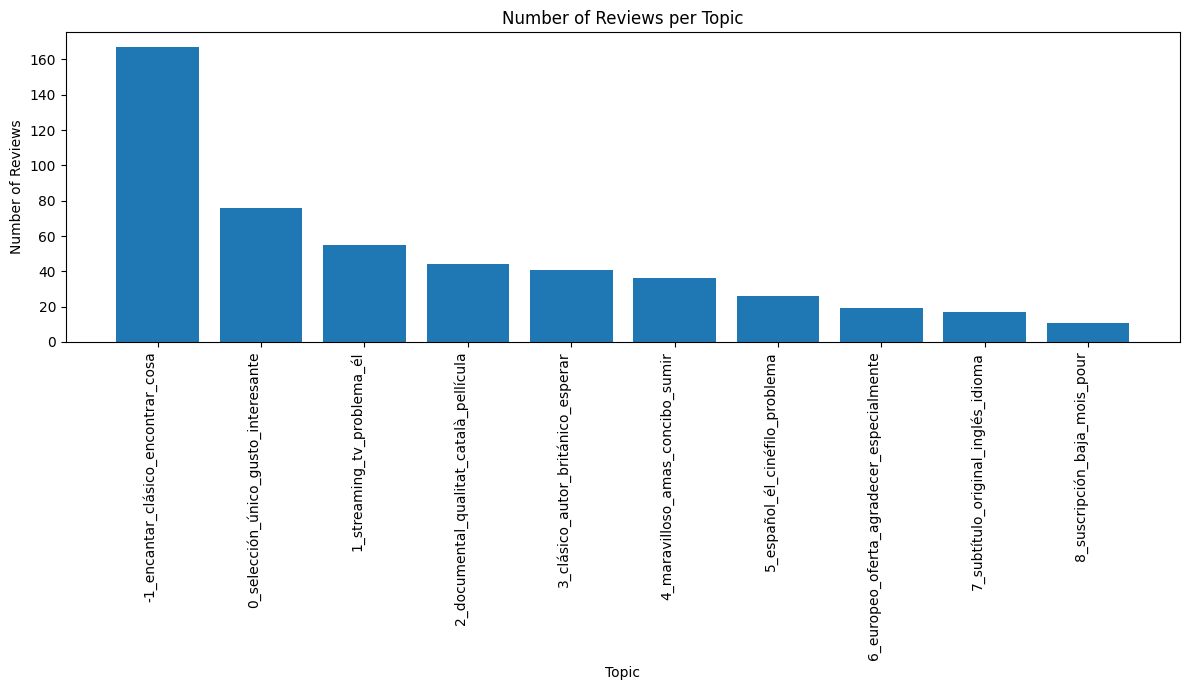

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df and BERTopic_Label column are available (assuming previous cells were run)
if 'df' not in locals() or 'BERTopic_Label' not in df.columns:
    print("Error: DataFrame 'df' or 'BERTopic_Label' column not found. Please run the preceding data loading and BERTopic fitting cells.")
else:
    # Retrieve topic labels from the model (assuming bertopic_model is available)
    if 'bertopic_model' in locals():
        # Get the count of each topic
        topic_counts = df['BERTopic_Label'].value_counts().sort_index()

        # Get topic information to map topic indices to names (default or custom)
        topic_info = bertopic_model.get_topic_info()
        # Create a mapping from Topic index to Name
        topic_name_map = dict(zip(topic_info['Topic'], topic_info['Name']))

        # Use the mapped names for the tick labels
        tick_labels = [topic_name_map.get(i, f"Topic {i}") for i in topic_counts.index]

        plt.figure(figsize=(12,7)) # Increased figure size for better readability
        plt.bar(range(len(topic_counts)), topic_counts, tick_label=tick_labels)
        plt.xticks(rotation=90, ha='right') # Rotate labels more and align
        plt.xlabel('Topic')
        plt.ylabel('Number of Reviews')
        plt.title('Number of Reviews per Topic')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'bertopic_model' not found. Please run the BERTopic fitting cell.")

### **39.** Cross Topics with Sentiment

Calculates and visualizes the average sentiment score for each topic, allowing you to see which topics are associated with more positive or negative reviews.

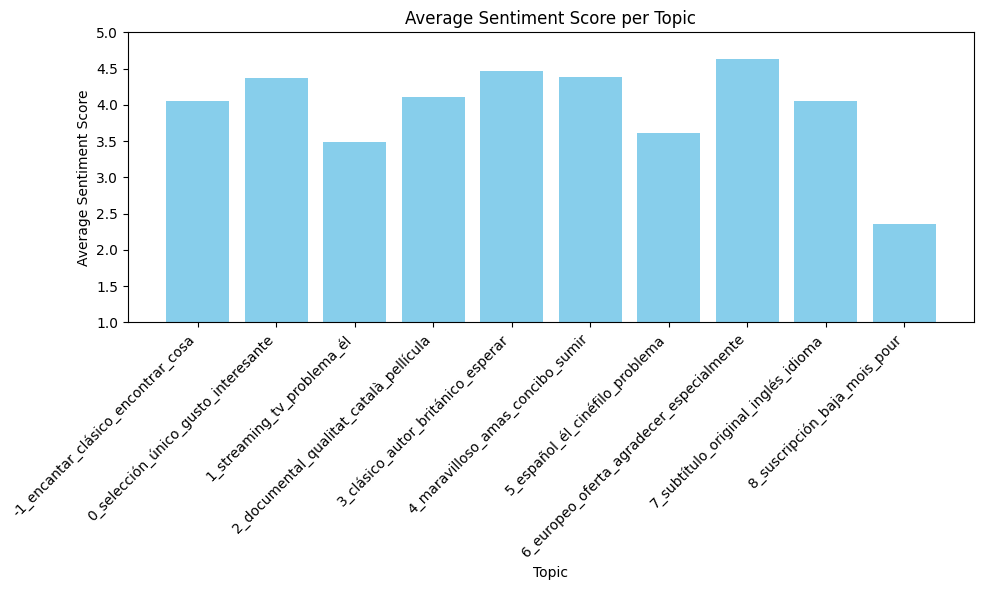

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is available (assuming data loading and preprocessing cells were run)
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please run the preceding data loading and preprocessing cells.")
else:
    # Ensure 'Sentiment_Score' column exists (code from cell ZxNe28bySIb_)
    if 'Sentiment_Score' not in df.columns:
        print("Creating 'Sentiment_Score' column...")
        sentiment_map = {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}
        # Ensure 'DistilBERT_Sentiment' is available
        if 'DistilBERT_Sentiment' in df.columns:
             df['Sentiment_Score'] = df['DistilBERT_Sentiment'].map(sentiment_map)
        else:
            print("Error: 'DistilBERT_Sentiment' column not found. Please run the sentiment analysis cells.")
            df['Sentiment_Score'] = None # Prevent error if column is missing


    # Ensure 'BERTopic_Label' column is available
    if 'BERTopic_Label' not in df.columns:
         print("Error: 'BERTopic_Label' column not found. Please run the BERTopic fitting cell.")
         # Assign a dummy label to prevent error in groupby
         df['BERTopic_Label'] = -2 # Use a value outside the normal range


    # Calculate average sentiment score per topic
    # Filter out rows where Sentiment_Score or BERTopic_Label might be missing due to errors
    topic_sentiment = df.dropna(subset=['Sentiment_Score', 'BERTopic_Label']).groupby('BERTopic_Label')['Sentiment_Score'].mean()


    # Ensure bertopic_model is available to get topic names
    if 'bertopic_model' not in locals():
        print("Error: 'bertopic_model' not found. Please run the BERTopic fitting cell.")
        # Use topic indices as labels if model is not available
        tick_labels = [str(i) for i in topic_sentiment.index]
    else:
        # Get topic information to map topic indices to default BERTopic names
        topic_info = bertopic_model.get_topic_info()
        # Create a mapping from Topic index to default BERTopic Name
        # Handle cases where a topic index might be in topic_sentiment but not in topic_info (e.g., dummy labels)
        topic_name_map = dict(zip(topic_info['Topic'], topic_info['Name']))

        # Use the mapped default names for the tick labels
        tick_labels = [topic_name_map.get(i, f"Topic {i}") for i in topic_sentiment.index]


    # Plot the average sentiment score per topic
    plt.figure(figsize=(10,6))
    plt.bar(range(len(topic_sentiment)), topic_sentiment, tick_label=tick_labels, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Topic')
    plt.ylabel('Average Sentiment Score')
    plt.title('Average Sentiment Score per Topic')
    plt.ylim(1, 5) # Assuming sentiment is on a 1-5 scale
    plt.tight_layout()
    plt.show()

### **40.** Topic Frequency Over Time

Displays how often each topic appears over time, making it easy to spot trends or changes in user concerns.

<Figure size 1500x700 with 0 Axes>

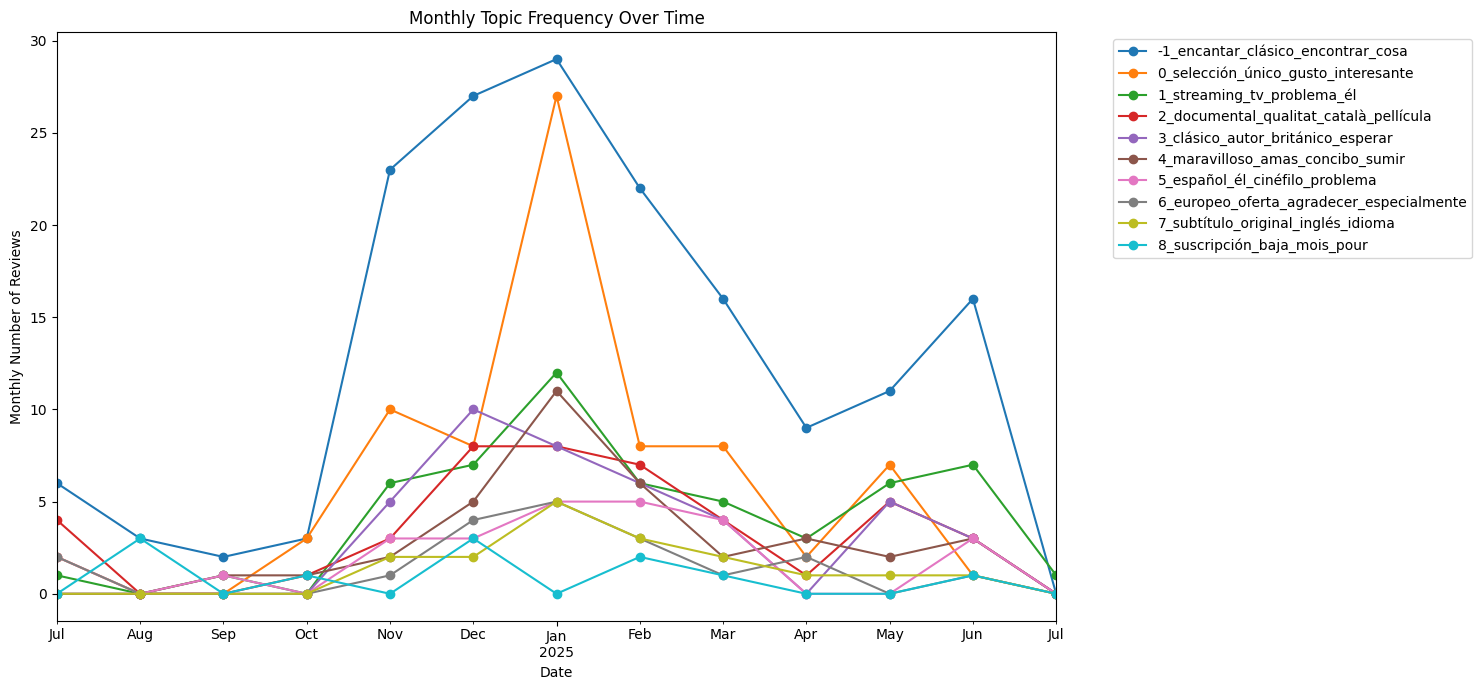

In [ ]:
# prompt: desarrolla código para esto: ### **40.** Topic Frequency Over Time
# Displays how often each topic appears over time, making it easy to spot trends or changes in user concerns.

import matplotlib.pyplot as plt
# Ensure df is available (assuming data loading and preprocessing cells were run)
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please run the preceding data loading and preprocessing cells.")
elif 'Date' not in df.columns:
     print("Error: 'Date' column not found. Please ensure date parsing was successful.")
elif 'BERTopic_Label' not in df.columns:
     print("Error: 'BERTopic_Label' column not found. Please run the BERTopic fitting cell.")
elif 'bertopic_model' not in locals():
    print("Error: 'bertopic_model' not found. Please run the BERTopic fitting cell.")
else:
    # Group by date and topic, then count the occurrences
    topic_time = df.groupby(['Date', 'BERTopic_Label']).size().unstack(fill_value=0)

    # Resample the data to a monthly frequency and sum the counts for each topic
    # Use 'M' for monthly frequency
    topic_time_monthly = topic_time.resample('M').sum()

    # Filter out the -1 topic if you don't want to visualize outliers
    # topic_time_monthly = topic_time_monthly.drop(columns=[-1], errors='ignore')


    # Plot the topic frequency over time (monthly)
    plt.figure(figsize=(15,7))
    ax = topic_time_monthly.plot(figsize=(15,7), marker='o') # Assign plot to an axes object
    plt.xlabel('Date')
    plt.ylabel('Monthly Number of Reviews')
    plt.title('Monthly Topic Frequency Over Time')

    # Optional: Add a logarithmic scale to the y-axis if there's a large variance in topic counts
    # use_log_scale = False # Set to True to use logarithmic scale for y-axis
    # if use_log_scale:
    #     ax.set_yscale('log')
    #     plt.ylabel('Monthly Number of Reviews (log scale)')

    # Ensure legend labels match the columns in topic_time_monthly which are the topic numbers
    # Get the topic names corresponding to the columns in topic_time_monthly
    # Use bertopic_model.topic_labels_ which is a list of labels ordered by topic index (-1, 0, 1...)
    # Create a dictionary mapping topic index to its name from the model's topic_info
    topic_name_map = dict(zip(bertopic_model.get_topic_info()['Topic'], bertopic_model.get_topic_info()['Name']))

    # Create legend labels using the mapped names, defaulting to the topic index if name not found
    legend_labels = [topic_name_map.get(i, f"Topic {i}") for i in topic_time_monthly.columns]

    plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### **41.** Export Topic Assignments and Examples

Exports a sample of reviews for each topic, including their assigned topic label, topic name, and original text, for reporting or further analysis.

In [ ]:
# Assuming df and topics are available from previous cells
# Ensure the BERTopic_Label column exists
if 'df' in locals() and 'topics' in locals() and len(df) == len(topics):
    df['BERTopic_Label'] = topics

# Check if df and BERTopic_Label column exist before proceeding
if 'df' in locals() and 'BERTopic_Label' in df.columns:
    # Filter for reviews assigned to the outlier topic (-1)
    outliers = df[df['BERTopic_Label'] == -1]['Clean_Review'].head(10)

    # Display the outlier reviews
    print("Sample outlier reviews (Topic -1):")
    if not outliers.empty:
        for i, review in enumerate(outliers, 1):
            print(f"Outlier {i}: {review}\n")
    else:
        print("No outlier reviews found (Topic -1).")

else:
    print("Error: DataFrame 'df' or 'BERTopic_Label' column not found. Please ensure the data loading and BERTopic fitting cells were run successfully.")

Sample outlier reviews (Topic -1):
Outlier 1: quiero la prejubilación y más filmin cine cine y más cine lo único malo que puedo decir de filmin es que nunca acabaré con la lista de películas guardadas para después guardadas para la eternidad

Outlier 2: con qué única plataforma te quedarías la típica pregunta si solo pudieras tener una plataforma cuál sería sin discusión filmin

Outlier 3: mi plataforma preferida mi plataforma preferida donde encuentro las series y películas más interesantes de otras culturas las que no se encuentran en otras plataformas cine independiente

Outlier 4: esta plataforma conta cunha variedade e esta plataforma conta cunha variedade e calidade de contidos única encántanme as seccións de recomendacións que crean máis alá dunha mera temática invitando a personalidades a facer unha listaxe creando un calendario de advento cinéfilo un quiz sobre os oscars etc doulle un 45 porque gstaríame que se incluise máis contido dobrado ou subtitulado ó galego igualmente m

### **42.** Analyze Outliers (Topic -1)

Examines reviews assigned to the outlier topic (-1) to understand what kind of content is not being captured by any topic.

In [ ]:
# prompt:  Analyze Outliers (Topic -1)
# Examines reviews assigned to the outlier topic (-1) to understand what kind of content is not being captured by any topic.

# Assuming df is available from previous cells
# Ensure the BERTopic_Label column exists and BERTopic model is fitted
if 'df' in locals() and 'BERTopic_Label_Refined' in df.columns and 'bertopic_model' in locals():

    # Filter for reviews assigned to the outlier topic (-1)
    outliers_df = df[df['BERTopic_Label_Refined'] == -1]

    print(f"Total number of outlier reviews (Topic -1): {len(outliers_df)}")
    print("\nSample outlier reviews (Topic -1):")

    # Display sample outlier reviews from the 'Clean_Review' column
    if not outliers_df.empty:
        # Display a maximum of 10 sample reviews for brevity
        for i, (index, row) in enumerate(outliers_df.head(10).iterrows(), 1):
            print(f"Outlier {i} (Index {index}): {row['Clean_Review']}\n")
    else:
        print("No outlier reviews found (Topic -1).")

    # Optional: Analyze the characteristics of outlier reviews
    if not outliers_df.empty:
        print("\nCharacteristics of Outlier Reviews:")
        print("- Language distribution:\n", outliers_df['Language'].value_counts())
        print("- Sentiment distribution:\n", outliers_df['DistilBERT_Sentiment'].value_counts())
        print("- Average Sentiment Score:", outliers_df['Sentiment_Score'].mean())
        # You could add more analysis here, e.g., length of reviews, specific words, etc.

else:
    print("Error: DataFrame 'df', 'BERTopic_Label_Refined' column, or 'bertopic_model' not found. Please ensure the data loading, preprocessing, and BERTopic fitting cells were run successfully.")

Total number of outlier reviews (Topic -1): 167

Sample outlier reviews (Topic -1):
Outlier 1 (Index 1): quiero la prejubilación y más filmin cine cine y más cine lo único malo que puedo decir de filmin es que nunca acabaré con la lista de películas guardadas para después guardadas para la eternidad

Outlier 2 (Index 6): con qué única plataforma te quedarías la típica pregunta si solo pudieras tener una plataforma cuál sería sin discusión filmin

Outlier 3 (Index 14): mi plataforma preferida mi plataforma preferida donde encuentro las series y películas más interesantes de otras culturas las que no se encuentran en otras plataformas cine independiente

Outlier 4 (Index 16): esta plataforma conta cunha variedade e esta plataforma conta cunha variedade e calidade de contidos única encántanme as seccións de recomendacións que crean máis alá dunha mera temática invitando a personalidades a facer unha listaxe creando un calendario de advento cinéfilo un quiz sobre os oscars etc doulle un 45

### **43.** End-to-End Review Analysis Pipeline

Defines a function to analyze and visualize user reviews for the Filmin platform. The function performs key steps to preprocess the review data, summarize sentiment and topics, and generate visualizations.

*   Data preprocessing (cleaning review text).

*   Sentiment distribution visualization (using DistilBERT results).

*   Display of the top 5 topics (from BERTopic).

*   Visualizations: sentiment distribution bar chart and word clouds for positive and negative reviews.

This validates that the model and workflow produce actionable insights from real data.

Sentiment Distribution:
DistilBERT_Sentiment
1 star      39
2 stars     22
3 stars     65
4 stars    107
5 stars    259
Name: count, dtype: int64

Topic information not available in the DataFrame.


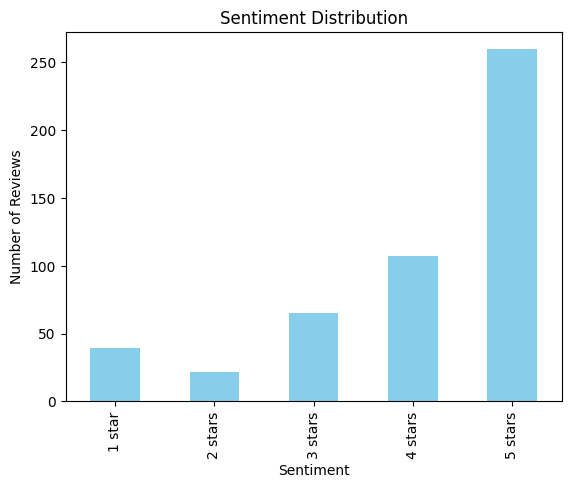

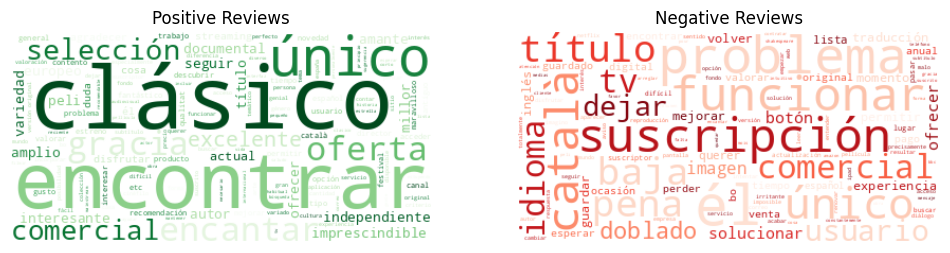

In [ ]:
def filmin_review_prototype(df):
    # 1. Basic Preprocessing
    df['Clean_Review'] = df['Body'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # 2. Sentiment Distribution
    sentiment_counts = df['DistilBERT_Sentiment'].value_counts().sort_index()
    print("Sentiment Distribution:")
    print(sentiment_counts)

    # 3. Top 5 Topics
    if 'Topic' in df.columns:
        top_topics = df['Topic'].value_counts().head(5)
        print("\nTop 5 Topics Detected:")
        print(top_topics)
    else:
        print("\nTopic information not available in the DataFrame.")

    # 4. Sentiment Bar Chart
    import matplotlib.pyplot as plt
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()

    # 5. Word Clouds for Positive and Negative Reviews
    from wordcloud import WordCloud
    positive_text = ' '.join(df[df['DistilBERT_Sentiment'].isin(['4 stars', '5 stars'])]['BERTOPIC_Text'])
    negative_text = ' '.join(df[df['DistilBERT_Sentiment'].isin(['1 star', '2 stars'])]['BERTOPIC_Text'])
    wordcloud_pos = WordCloud(width=400, height=200, background_color='white', colormap='Greens').generate(positive_text)
    wordcloud_neg = WordCloud(width=400, height=200, background_color='white', colormap='Reds').generate(negative_text)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].imshow(wordcloud_pos, interpolation='bilinear')
    axs[0].set_title('Positive Reviews')
    axs[0].axis('off')
    axs[1].imshow(wordcloud_neg, interpolation='bilinear')
    axs[1].set_title('Negative Reviews')
    axs[1].axis('off')
    plt.show()

# Run the prototype with your DataFrame
filmin_review_prototype(df)


## **PART 4:** Building an Interactive Model Interface with Gradio

### **44.** Installing Gradio for Interactive Apps

This step installs the Gradio library which enables the creation of simple, web-based interfaces for machine learning models and Python functions.

In [ ]:
!pip install gradio

### **45.** Importing Gradio
This step imports the Gradio library allowing ts functions to build interactive interfaces in Python code.

In [ ]:
import gradio as gr

### **46.** PROTOTYPE 1: Only sentiment analysis

Create an interactive web app for analyzing the sentiment of Filmin user reviews using Gradio.

*   **Sentiment Analysis Function:** Defines a function that predicts the sentiment label (e.g., positive, negative, neutral) of a given review using a sentiment analysis pipeline.

*   **User Interface:** Uses Gradio to build a simple text box where users can paste a review and immediately see the predicted sentiment.

*   **App Launch:** Runs the interactive tool in a shareable web interface, allowing others to test the sentiment analysis model directly from their browser.

In [ ]:
def analyze_sentiment_review(text):
    sentiment = sentiment_pipeline(text)[0]['label']
    return sentiment

def call_endpoint(name):
    # Create the prompt
    prompt = f"Paste a Filmin review here... {user_input_text}"
    # connect to the enpoint and get an output
    output = request("https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/sagemaker-xgboost-2025-07-12-08-27-38-074/invocations")

    return output

prototype1 = gr.Interface(
    fn=analyze_sentiment_review,
    inputs="text",
    outputs="text",
    title="Filmin Review Analyzer",
    description="Paste a user review to see the predicted sentiment (and topic if implemented)."
)

prototype1.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c92407f85fc26701f8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### **47.** PROTOTYPE 2: Only topic analysis

Create an interactive Gradio app that identifies the main topic of a Filmin review using a BERTopic model.

*   **Topic Detection Function:** Analyzes the input text, retrieves the most relevant topic number, and displays its top keywords. If no topic is detected, a default message is shown.

*   **User Interface:** Provides a text input for user reviews and displays both the predicted topic number and the associated keywords.

*   **App Launch:** Deploys the interface in a shareable format so users can explore what topics are discussed in reviews.

In [ ]:
def identify_topic(text):
    topics, _ = bertopic_model.transform([text])
    topic_num = topics[0]
    if topic_num == -1:
        topic_keywords = "No topic detected"
    else:
        topic_info = bertopic_model.get_topic(topic_num)
        if topic_info:
            topic_keywords = ', '.join([word for word, _ in topic_info])
        else:
            topic_keywords = "No keywords found"
    return f"Topic: {topic_num}", f"Keywords: {topic_keywords}"

def call_endpoint(name):
    # Create the prompt
    prompt = f"Paste a Filmin review here... {user_input_text}"
    # connect to the enpoint and get an output
    output = request("https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/sagemaker-xgboost-2025-07-12-08-27-38-074/invocations")

    return output

prototype2 = gr.Interface(
    fn=identify_topic,
    inputs="text",
    outputs=[
        gr.Textbox(label="Predicted Topic"),
        gr.Textbox(label="Topic Keywords")
    ],
    title="Filmin Review Topic Identifier",
    description="Paste a user review to see the main topic(s) discussed."
)

prototype2.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b11fb82751137d9c21.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### **48.** PROTOTYPE 3: Sentiment and topics analysis

Build an app that simultaneously predicts the sentiment and main topic of a Filmin review.

*   **Sentiment Prediction:** Uses a sentiment analysis pipeline to classify the overall tone of the review.

*   **Topic Detection:** Applies a BERTopic model to identify the most relevant topic and its keywords.

*   **User Interface:** Displays the predicted sentiment, topic number, and top terms associated with the topic.

*   **App Launch:** Makes the tool available in a web interface for live testing and sharing.

In [ ]:
def analyze_sentiment_and_topic(text):
    # Sentiment prediction
    sentiment = sentiment_pipeline(text)[0]['label']

    # Topic prediction
    topics, _ = bertopic_model.transform([text])
    topic_num = topics[0]
    if topic_num == -1:
        topic_keywords = "No topic detected"
    else:
        topic_info = bertopic_model.get_topic(topic_num)
        if topic_info:
            topic_keywords = ', '.join([word for word, _ in topic_info])
        else:
            topic_keywords = "No keywords found"

    return sentiment, f"Topic: {topic_num}", f"Keywords: {topic_keywords}"

def call_endpoint(name):
    # Create the prompt
    prompt = f"Paste a Filmin review here... {user_input_text}"
    # connect to the enpoint and get an output
    output = request("https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/sagemaker-xgboost-2025-07-12-08-27-38-074/invocations")

    return output

prototype3 = gr.Interface(
    fn=analyze_sentiment_and_topic,
    inputs="text",
    outputs=[
        gr.Textbox(label="Predicted Sentiment"),
        gr.Textbox(label="Predicted Topic"),
        gr.Textbox(label="Topic Keywords")
    ],
    title="Filmin Review Sentiment & Topic Analyzer",
    description="Paste a user review to see the predicted sentiment and the main topic(s) discussed."
)

prototype3.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aca7725a446e195476.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
